In [1]:
#write your code here You can create more cells
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cvxopt
import cvxopt.solvers
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

dataset = pd.read_csv("SVM_data1.csv",sep=',')
print(dataset.head())
print(dataset.shape)
print(dataset.describe())
dataset['Label'].value_counts()

     GATE     UGC  Label
0  1.9643  4.5957      1
1  2.2753  3.8589      1
2  2.9781  4.5651      1
3  2.9320  3.5519      1
4  3.5772  2.8560      1
(51, 3)
            GATE        UGC      Label
count  51.000000  51.000000  51.000000
mean    2.268780   3.132512   0.411765
std     0.928531   0.753256   0.497050
min     0.086405   1.617700   0.000000
25%     1.572550   2.636000   0.000000
50%     2.275300   3.070900   0.000000
75%     2.955050   3.531400   1.000000
max     4.015000   4.616200   1.000000


Label
0    30
1    21
Name: count, dtype: int64

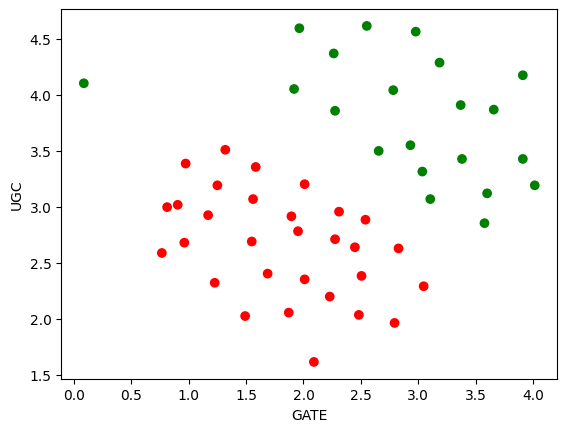

In [2]:
#write your code here You can create more cells
#plotting dataset for two classes
X = dataset.iloc[:,:-1].to_numpy()
#print(X[:,0])
Y = dataset.iloc[:,-1].to_numpy()
#print(Y)
colors = []
for i in range(len(Y)):
    if(Y[i] == 0):
        colors.append("Red")
    else:
        colors.append("Green")

plt.scatter(X[:,0],X[:,1],color=colors)
plt.xlabel("GATE")
plt.ylabel("UGC")
plt.show()

     pcost       dcost       gap    pres   dres
 0:  2.1625e+01 -7.0015e+03  1e+04  5e-01  2e-13
 1:  1.9241e+02 -1.1593e+03  2e+03  3e-02  2e-13
 2:  4.3138e+01 -1.9959e+02  3e+02  3e-03  1e-13
 3:  2.4225e+00 -1.4276e+02  2e+02  1e-03  1e-13
 4: -3.2237e+01 -6.5986e+01  3e+01  6e-06  1e-13
 5: -4.2406e+01 -5.7709e+01  2e+01  2e-06  1e-13
 6: -4.8384e+01 -4.9751e+01  1e+00  1e-07  1e-13
 7: -4.9046e+01 -4.9140e+01  9e-02  6e-09  1e-13
 8: -4.9092e+01 -4.9093e+01  9e-04  6e-11  1e-13
 9: -4.9093e+01 -4.9093e+01  9e-06  6e-13  1e-13
Optimal solution found.
Alphas =  [16.9999973  16.2524108  12.97173064  3.28067854 16.99999984]
w =  [2.44355964 5.37150931]
b =  [-23.12206696]
S =  [[2.0103   3.2039  ]
 [1.3191   3.5109  ]
 [3.5772   2.856   ]
 [3.1048   3.0709  ]
 [0.086405 4.1045  ]]
number of support vectors:  5 , number of misclassified points:  [1]


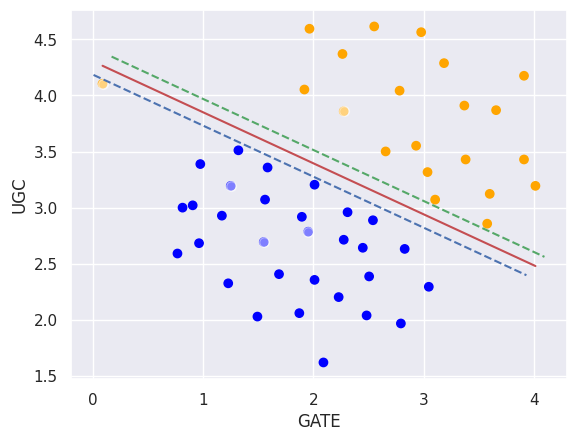

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

from sklearn.svm import SVC
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers

data = pd.read_csv('SVM_data1.csv', sep=",")
X = data.iloc[:, 0:2].values.astype(np.float32)
y = data.iloc[:, 2].values.astype(np.float32)
#print(Y)

threshold = np.median(y)
y[y <= threshold] = -1
y[y > threshold] = 1

X = np.vstack((X[y==-1], X[y==1]))
y = np.hstack((-np.ones((sum(y==-1))), np.ones((sum(y==1)))))

C = 17
m,n = X.shape
y = y.reshape(-1,1) * 1.
X_dash = y * X
H = np.dot(X_dash , X_dash.T) * 1.

#Converting into cvxopt format - as previously
P = cvxopt_matrix(H)
q = cvxopt_matrix(-np.ones((m, 1)))
G = cvxopt_matrix(np.vstack((np.eye(m)*-1,np.eye(m))))
h = cvxopt_matrix(np.hstack((np.zeros(m), np.ones(m) * C)))
A = cvxopt_matrix(y.reshape(1, -1))
b = cvxopt_matrix(np.zeros(1))

#Run solver
sol = cvxopt_solvers.qp(P, q, G, h, A, b)
alphas = np.array(sol['x'])

#==================Computing and printing parameters===============================#
w = ((y * alphas).T @ X).reshape(-1,1)
S = (alphas > 1e-4).flatten()
b = y[S] - np.dot(X[S], w)

#Display results
print('Alphas = ',alphas[alphas > 1e-4])
print('w = ', w.flatten())
print('b = ', b[0])
print('S = ', X[S])

num_support_vec = len(X[S])
y_pred = np.sign(np.dot(X, w) + b[0])
num_missclass = sum(y_pred!=y)
print("number of support vectors: ",num_support_vec,", number of misclassified points: ", num_missclass)



#plotting dataset for two classes
X = dataset.iloc[:,:-1].to_numpy()
#print(X[:,0])
Y = dataset.iloc[:,-1].to_numpy()
#print(Y)
colors = []
for i in range(len(Y)):
    if(Y[i] == 0):
        colors.append("Blue")
    else:
        colors.append("Orange")

fig, ax = plt.subplots()



mx = X[:, 0]
my = X[:, 1]

xmin, xmax = mx.min(), mx.max()
ymin, ymax = my.min(), my.max()

xx = np.linspace(xmin, xmax)
yy = -(w[0]/w[1])*xx-b[0]/w[1]

plt.plot(xx, yy, c='r')

wh = w[0]/(np.sqrt(np.sum(w[0]**2)))

margin = 1/(np.sqrt(np.sum(w[0]**2))*5)

boundary_pts = np.array(list(zip(xx, yy)))
points_above = boundary_pts + wh*margin
points_below = boundary_pts - wh*margin

plt.plot(points_above[:,0], points_above[:,1], 'g', linestyle = "dashed")
plt.plot(points_below[:,0], points_below[:,1], 'b', linestyle = "dashed")

plt.scatter(X[:,0],X[:,1],color=colors)
plt.scatter(X[S, 0],X[S, 1],s=51,color="white",alpha=.5)
plt.xlabel("GATE")
plt.ylabel("UGC")
plt.show()

# Polynomial Kernel

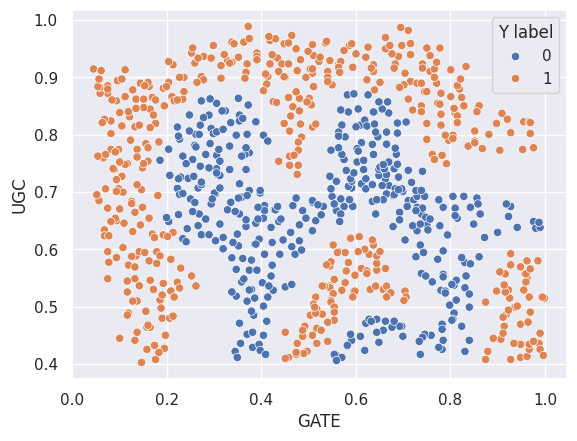

In [9]:
import numpy as np
import cvxopt
import cvxopt.solvers
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
sns.set()

from sklearn.svm import SVC
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers

data = pd.read_csv('SVM_data2.csv', sep=",")
X = data.iloc[:, 0:2].values.astype(np.float32)
y = data.iloc[:, 2].values.astype(np.float32)
sns.scatterplot(x="GATE", y="UGC", hue="Y label", data=data)
plt.show()

In [10]:
threshold = np.median(y)
#print(y)

y[y < threshold] = -1
y[y >= threshold] = 1

X = np.vstack((X[y==-1], X[y==1]))
y = np.hstack((-np.ones((sum(y==-1))), np.ones((sum(y==1)))))

#print(data)

#print(X)
#print(y)

In [11]:
import numpy as np
from cvxopt import matrix, solvers

class SVC:
    """
    Implemenation of Support Vector binary classifier
    """
    def __init__(self, C = None, kernel = 'Linear', degree = 6, intercept = 1, sigma = 1, normalize = False):
        """
        Initialize classifier

        :param float C : Slack variable
        :param string kernel : Type of kernel
        :param integer degree : Degree for polynomial kernel
        :param float intercept : Intercept for polynomial kernel
        :param float sigma : Sigma for Gaussian kernel
        :param boolean normalize : To normalize data
        """
        if kernel == 'Linear':
            self.kernel = self._linear_kernel
        elif kernel == 'Gaussian':
            self.kernel = self._gaussian_kernel
        elif kernel == 'Poly':
            self.kernel = self._poly_kernel
        else:
            raise Exception('Unsupported Kernel')

        self.C = C
        self.degree = degree
        self.intercept = intercept
        self.sigma = sigma
        self.normalize = normalize

    def fit(self, X, y):
        """
        Fit input data X to labels y

        :param numpy.array X : Input data
        :param numpy.array y : Labels, must be binary
        """
        m, n = X.shape
        X = np.copy(X)
        y = np.copy(y)
        y = y.reshape(-1, 1)
        print(X.shape, y.shape)
        assert(X.shape[0] == y.shape[0])
        self.labels = np.unique(y)
        print(self.labels)
        assert(len(self.labels) == 2)

        mask = y == self.labels[0]
        y[mask] = 1
        y[~mask] = -1
        y = y * 1.

        if self.normalize:
            self.means = np.mean(X, axis = 0)
            self.stds = np.std(X, axis = 0)
            X = (X - self.means) / self.stds

        K = self.kernel(X, X)
        P = matrix(np.matmul(y,y.T) * K)
        q = matrix(np.ones((m, 1)) * -1)
        A = matrix(y.reshape(1, -1))
        b = matrix(np.zeros(1))

        if self.C is None:
            G = matrix(np.eye(m) * -1)
            h = matrix(np.zeros(m))
        else:
            G = matrix(np.vstack((np.eye(m) * -1, np.eye(m))))
            h = matrix(np.hstack((np.zeros(m), np.ones(m) * self.C)))

        solution = solvers.qp(P, q, G, h, A, b)
        assert(solution['status'] != 'unkown')

        alphas = np.array(solution['x'])
        ind = (alphas > 1e-4).flatten()
        self.sv = X[ind]
        self.sv_y = y[ind]
        self.alphas = alphas[ind]
        b = self.sv_y - np.sum(self.kernel(self.sv, self.sv) * self.alphas * self.sv_y, axis=0)
        self.b = np.sum(b) / b.size

        if self.kernel == self._linear_kernel:
            self.w = np.sum(self.alphas * self.sv_y * self.sv, axis=0)
        else:
            self.w = None


    def predict(self, X):
        """
        Predict labels for input data X

        :param numpy.array X : Input data
        :return np.array : Predictions
        """
        if self.normalize:
            X = (X - self.means) / self.stds
        if self.w is None:
            prod = np.sum(self.kernel(self.sv, X) * self.alphas * self.sv_y,
                      axis=0) + self.b
        else:
            prod = np.dot(self.w, X.T) + self.b
        y = np.sign(prod)
        y = y.reshape(-1, 1)
        mask = y == 1.
        y[mask] = self.labels[0]
        y[~mask] = self.labels[1]
        return y

    def _poly_kernel(self, x, z):
        """
        Polynomial Kernel

        :param numpy.array x
        :param numpy.array z
        :return numpy.array
        """
        return np.power(np.matmul(x, z.T) + self.intercept, self.degree)

    def _gaussian_kernel(self, x, z):
        """
        Gaussian Kernel

        :param numpy.array x
        :param numpy.array z
        :return numpy.array
        """
        n = x.shape[0]
        m = z.shape[0]
        xx = np.dot(np.sum(np.power(x, 2), 1).reshape(n, 1), np.ones((1, m)))
        zz = np.dot(np.sum(np.power(z, 2), 1).reshape(m, 1), np.ones((1, n)))
        return np.exp(-(xx + zz.T - 2 * np.dot(x, z.T)) / (2 * self.sigma ** 2))

    def _linear_kernel(self, x, z):
        """
        Linear Kernel

        :param numpy.array x
        :param numpy.array z
        :return numpy.array
        """
        return np.matmul(x, z.T)

In [12]:
y = y.T
# X = X.T

In [295]:
clf = SVC(kernel = "Poly", C = 100000, degree=7, intercept=1.16
          , normalize = True)
print(X.shape[0], y.shape[0])
clf.fit(X, y)

predictions = clf.predict(X)
#print(predictions)

863 863
(863, 2) (863, 1)
[-1.  1.]
     pcost       dcost       gap    pres   dres
 0:  2.6217e+09 -3.9467e+12  8e+12  4e-01  1e-05
 1:  7.4752e+09 -1.5674e+12  3e+12  1e-01  1e-05
 2:  1.1931e+10 -8.9890e+11  2e+12  6e-02  6e-06
 3:  1.3076e+10 -6.0265e+11  1e+12  4e-02  4e-06
 4:  1.3822e+10 -4.5295e+11  7e+11  2e-02  3e-06
 5:  1.4356e+10 -2.7248e+11  4e+11  1e-02  2e-06
 6:  1.1545e+10 -1.8463e+11  3e+11  6e-03  1e-06
 7:  8.0156e+09 -1.0693e+11  2e+11  3e-03  1e-06
 8:  4.3331e+09 -4.5943e+10  7e+10  1e-03  6e-07
 9:  2.1094e+09 -2.0466e+10  3e+10  4e-04  3e-07
10:  8.2852e+08 -4.6094e+09  7e+09  7e-05  2e-07
11:  2.2233e+08 -4.3615e+08  7e+08  5e-07  1e-07
12:  3.2669e+07 -3.6281e+07  7e+07  3e-09  8e-08
13:  4.6876e+06 -5.1993e+06  1e+07  8e-13  2e-08
14:  6.7121e+05 -7.4241e+05  1e+06  8e-14  1e-08
15:  9.5866e+04 -1.0658e+05  2e+05  3e-13  5e-09
16:  1.3605e+04 -1.5394e+04  3e+04  1e-13  2e-09
17:  1.8930e+03 -2.2587e+03  4e+03  1e-13  6e-10
18:  2.4250e+02 -3.4848e+02  6e+02

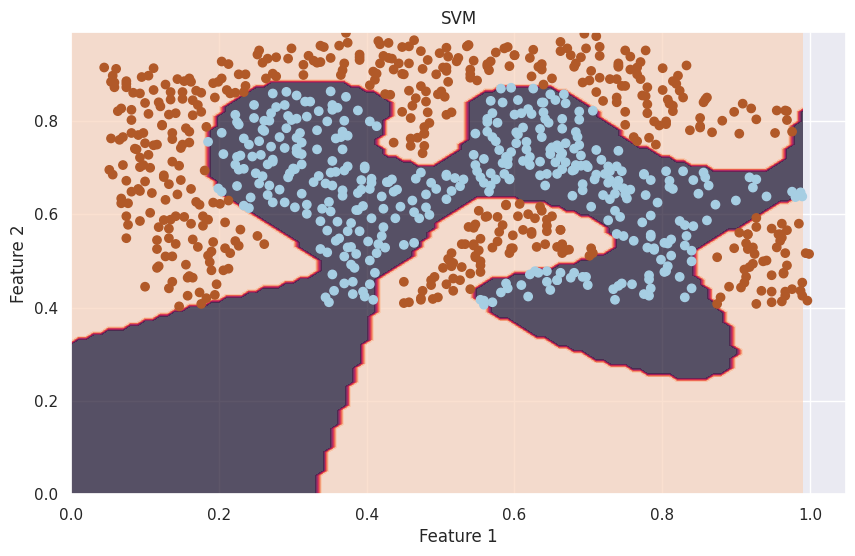

In [296]:
h = 0.01  # Step size in the mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(0, 1, h), np.arange(0, 1, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=0.7)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("SVM")
plt.show()

# Gaussian Kernel

In [310]:
clf = SVC(kernel = "Gaussian", sigma=0.02, normalize = False)
print(X.shape[0], y.shape[0])
clf.fit(X, y)

predictions = clf.predict(X)
#print(predictions)

863 863
(863, 2) (863, 1)
[-1.  1.]
     pcost       dcost       gap    pres   dres
 0: -9.4484e+01 -3.2745e+02  2e+02  6e-14  2e+00
 1: -1.0072e+02 -1.7118e+02  7e+01  7e-14  5e-01
 2: -1.0652e+02 -1.5025e+02  4e+01  9e-14  3e-01
 3: -1.0920e+02 -1.1651e+02  7e+00  5e-14  3e-02
 4: -1.1042e+02 -1.1182e+02  1e+00  8e-14  3e-03
 5: -1.1077e+02 -1.1106e+02  3e-01  8e-14  4e-04
 6: -1.1086e+02 -1.1091e+02  5e-02  9e-14  2e-05
 7: -1.1087e+02 -1.1088e+02  6e-03  7e-14  2e-06
 8: -1.1088e+02 -1.1088e+02  5e-04  3e-14  1e-07
 9: -1.1088e+02 -1.1088e+02  1e-05  5e-14  2e-09
Optimal solution found.


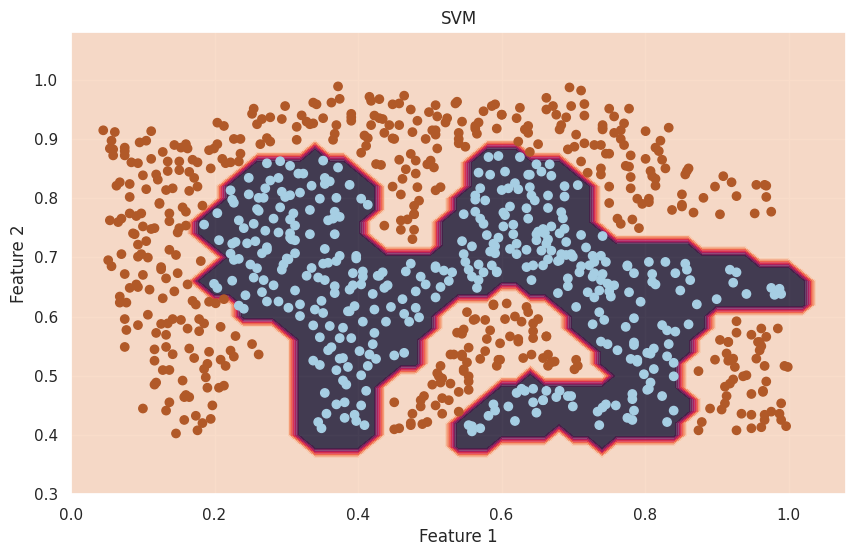

In [317]:
h = 0.02  # Step size in the mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(0, 1.1, h), np.arange(0.3, 1.1, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("SVM")
plt.show()